In [1]:
from create_data import DumbCirc as dc
from dklsuq import DeepKernelSUQ as dklu
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 26)
fc, pc, tc = data_instance.create_dataset(50, 2, [100], [0.2], True)

In [3]:
import torch
torch.manual_seed(26)
fc, pc, tc = torch.tensor(fc), torch.tensor(pc), torch.tensor(tc)

In [4]:
model = dklu(point_cloud=fc, partial_cloud=pc, test_partial=tc)

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model.set_device(device)

In [6]:
model.set_test_data(tc)

In [7]:
model.train_without_mapping(num_epochs=20, batch_size=20, learning_rate=0.001)

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dklsuq.py:149: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724788960438/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  + posterior_mean.T @ torch.linalg.inv(posterior_var) @ posterior_mean)


Epoch:0, Loss: 6404.7375
Epoch:1, Loss: 7685.684999999963
Epoch:2, Loss: 7941.874500000011
Epoch:3, Loss: 7993.112399999984
Epoch:4, Loss: 8003.3599799999965
Epoch:5, Loss: 8005.409496000037
Epoch:6, Loss: 8005.819399200007
Epoch:7, Loss: 8005.901379839983
Epoch:8, Loss: 8005.917775967997
Epoch:9, Loss: 8005.921055193618
Epoch:10, Loss: 8005.921711038705
Epoch:11, Loss: 8005.921842207759
Epoch:12, Loss: 8005.921868441534
Epoch:13, Loss: 8005.921873688325
Epoch:14, Loss: 8005.921874737646
Epoch:15, Loss: 8005.921874947567
Epoch:16, Loss: 8005.921874989476
Epoch:17, Loss: 8005.921874997858
Epoch:18, Loss: 8005.921874999534
Epoch:19, Loss: 8005.921874999907


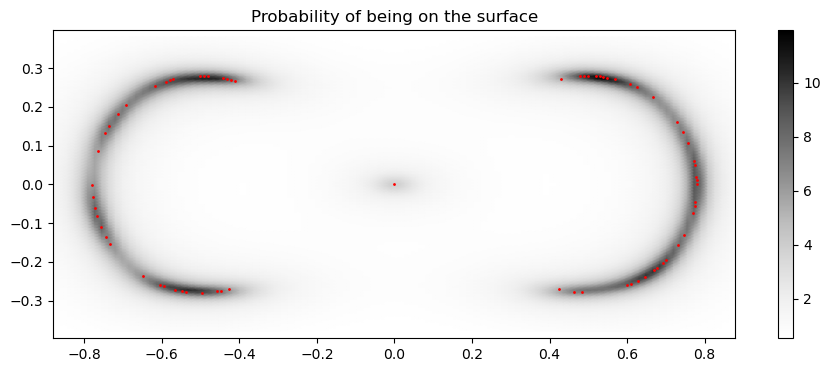

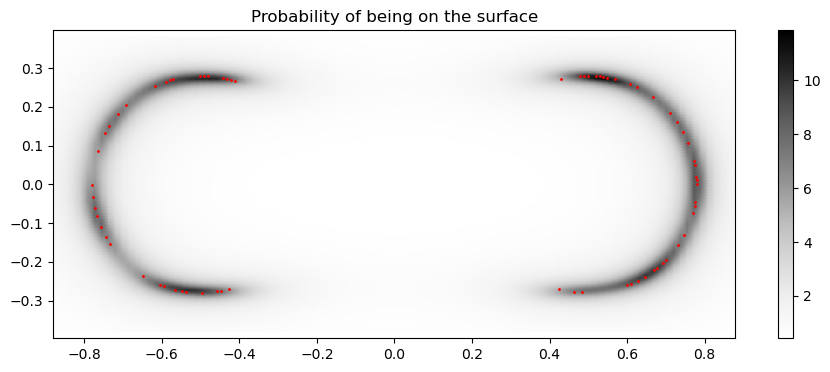

In [8]:
model.predict()

In [9]:
model.set_test_data(pc[:2, :])

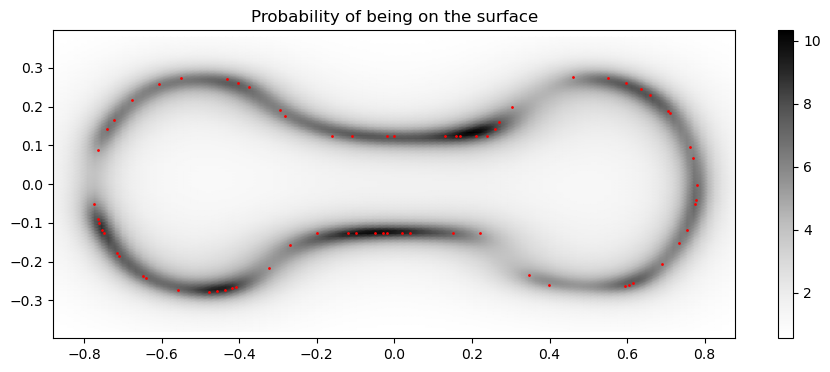

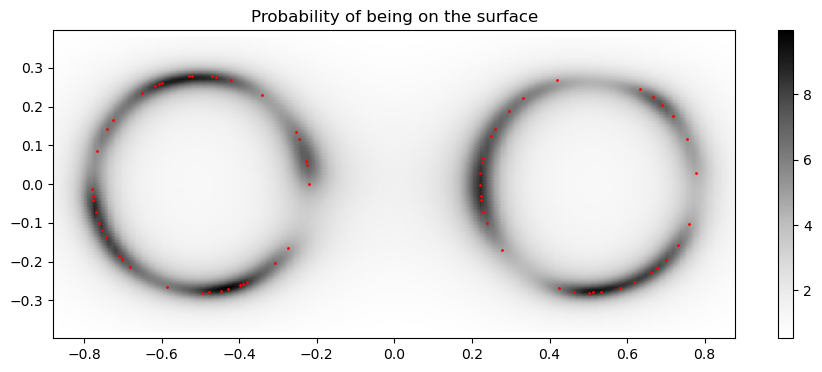

In [10]:
model.predict()